In [1]:
from scipy import io
import sys
sys.path.append("..")
import imp
import numpy as np
import time
from matplotlib import pyplot as plt

from EnsemblePursuit import EnsemblePursuit

# Example of fitting EnsemblePursuit to data

In [2]:
#data_path = 'H:/DATA/downloads/natimg2800_M170604_MP031_2017-06-28.mat'  # this file has red cells (GABA-ergic)
#data_path = 'H:/DATA/downloads/natimg2800_M160825_MP027_2016-12-14.mat' 
#data_path = 'H:/DATA/downloads/natimg2800_M161025_MP030_2017-05-29.mat' 
#data_path='H:/DATA/downloads/natimg2800_M170714_MP032_2017-08-07.mat' # this file has red cells (GABA-ergic)
#data_path = 'H:/DATA/downloads/natimg2800_M170717_MP033_2017-08-20.mat' 
data_path='H:/DATA/downloads/natimg2800_M170717_MP034_2017-09-11.mat' 

X = io.loadmat(data_path)['stim'][0]['resp'][0]

# standardize the columns of X
X = (X - np.mean(X,axis=0)) / (1e-5 + np.std(X, axis=0))

#X = X / (1e-5 + np.mean(X,axis=0)) # this is the right kind of preprocessing for NMF, do not z-score !!!

print('Shape of the data matrix, timepoints by neurons:',X.shape)

Shape of the data matrix, timepoints by neurons: (5880, 10103)


In [ ]:
model = EnsemblePursuit.EnsemblePursuit(n_components = 150).fit(X)

obtained 25 PCs in 1.2911 seconds
initialized 25 clusters with k-means in 3.6047 seconds
ensemble 0, time 8.07, nr neurons 7705, EV 0.0196
ensemble 25, time 22.28, nr neurons 315, EV 0.0606


In [ ]:
# two-repeats decoding
import imp
imp.reload(EnsemblePursuit)
imp.reload(utils)
from EnsemblePursuit import utils

dat   = io.loadmat(data_path)
istim = dat['stim']['istim'][0][0].astype(np.int32) # stimulus information
stat  = dat['stat'] # per-neuron information

istim -= 1 # get out of MATLAB convention
istim  = istim[:,0]
nimg   = istim.max() # these are blank stims (exclude them)

V     = model.components_ 
valid_stims = istim<nimg

V     = V[valid_stims, :]
istim = istim[valid_stims]

utils.evaluate_model(V, istim)

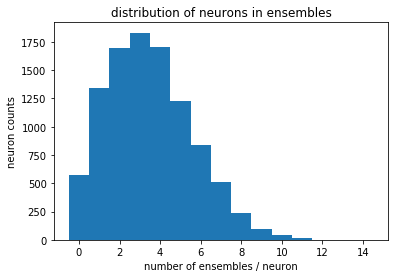

In [15]:
plt.hist(np.sum(model.weights>0, axis=1), bins = np.arange(-.5,15,1))
plt.xlabel('number of ensembles / neuron')
plt.ylabel('neuron counts')
plt.title('distribution of neurons in ensembles')
plt.show()


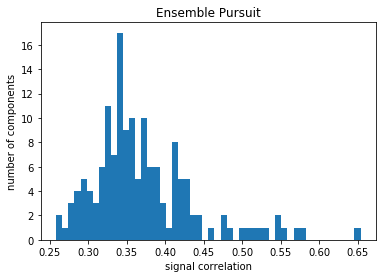

In [56]:
# compute correlation of ensembles between the two repeats
imp.reload(utils)

cc = utils.stimulus_correlation(V, istim)
plt.hist(cc, 50)
plt.xlabel('signal correlation')
plt.ylabel('number of components')
plt.title('Ensemble Pursuit')
plt.show()

In [19]:
# how are the GAD neurons distributed in ensembles?
red = np.array([stat[n]['redcell'][0][0][0] for n in range(len(stat))]) # extract boolean variable (is this neuron GABA?)

spW = np.sum(model.weights>0, axis=1)
redness = np.array([np.mean(red[W[:,n]>0]) for n in range(W.shape[1])])
plt.scatter(cc, redness)

plt.xlabel('signal correlation')
plt.ylabel('fraction of GABA-ergic neurons')
plt.title('GAD neurons in ensembles')
plt.show()



ValueError: no field of name redcell

0.5225


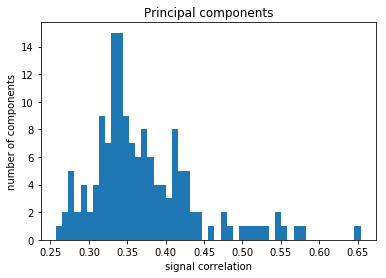

In [57]:
# same as above for PCs
from sklearn.decomposition import PCA

V = PCA(n_components=150).fit(X.T).components_.T
V     = V[valid_stims, :]

utils.evaluate_model(V, istim)

cc = utils.stimulus_correlation(V, istim)

plt.hist(cc, 50)
plt.xlabel('signal correlation')
plt.ylabel('number of components')
plt.title('Principal components')
plt.show()



# Figure out how to get behavior for these old datasets
At very least we have spontaneous activity so we can compute variance of ensemble during spontaneous activity

# Extract receptive fields 

In [ ]:
# to do (Maria): add the receptive field estimation to this notebook
# do NOT use classes, so that functions can be called on any array

# Ideas on what to do

You can modify the pipeline to fit other unsupervised models from sklearn for example. There are tons of unsupervised models on sklearn, such as PCA, sparsePCA, Latent Dirichlet Allocation, NMF and so forth. See some of the results from our poster https://github.com/mariakesa/EnsemblePursuit/blob/master/SAND9Poster Feel free to play around with the code and modify it as needed. 